# Quick-Start Guide

This guide explains how to use the library `fanchart`to create charts as those included in the [Monetary Policy Report - August 2022](https://www.bankofengland.co.uk/monetary-policy-report/2022/august-2022)

## Load Historical Data

We start by loading the data required to make the charts with the functions

 - `load_boe_history()` which loads the historical data for inflation (CPI)
 - `load_boe_parameters()` which loads the parameters for the quarterly projections

 Both data sets correspond to the Monetary Policy Report - August 2022

In [4]:
from fanchart import load_boe_history, load_boe_parameters
parameters = load_boe_parameters()
history = load_boe_history()

ModuleNotFoundError: No module named 'fanchart'

In [3]:
%config InlineBackend.figure_format ='retina'

Let's take a look at these data frames:

In [4]:
parameters

,Date,Mode,Uncertainty,Skewness
0,2022-07-01 00:00:00,9.93,0.69,0.00
1,2022-10-01 00:00:00,13.10,1.01,0.00
2,2023-01-01 00:00:00,12.56,1.35,0.26
3,2023-04-01 00:00:00,10.79,1.55,1.08
4,2023-07-01 00:00:00,9.53,1.68,1.00
5,2023-10-01 00:00:00,5.46,1.71,0.90
6,2024-01-01 00:00:00,4.33,1.74,0.71
7,2024-04-01 00:00:00,2.64,1.76,-0.13
8,2024-07-01 00:00:00,2.00,1.81,-0.08
9,2024-10-01 00:00:00,1.40,1.81,-0.05


In [5]:
history.head()

,Date,Inflation
0,2004-01-01 00:00:00,1.3
1,2004-04-01 00:00:00,1.4
2,2004-07-01 00:00:00,1.3
3,2004-10-01 00:00:00,1.4
4,2005-01-01 00:00:00,1.7


In [6]:
history.tail()

,Date,Inflation
69,2021-04-01 00:00:00,2.1
70,2021-07-01 00:00:00,2.8
71,2021-10-01 00:00:00,4.9
72,2022-01-01 00:00:00,6.2
73,2022-04-01 00:00:00,9.2


## Make your first Fan Chart

To make the complete fan chart we use the ``fan`` function which requires three parameters


- pars    : The parameters to be used for the quarterly forecasts. We can use the parameters previosly loaded
- probs   : The probabilities that define the bands in the fan chart. This should be a sequence of increasing probabilities in an araray type format.
- history : The historical values of the CPI inflation. We can use the parameters previously loaded


The results is plot showing

- The historical (observed) values of the CPI inflation from 2004 until a quarter before the projection starts.
- Then, the "fan" part is shown in a shadowed area and labeled as projection. This part illustrates the forecasted distribution for 13 quarters from the last observed value.




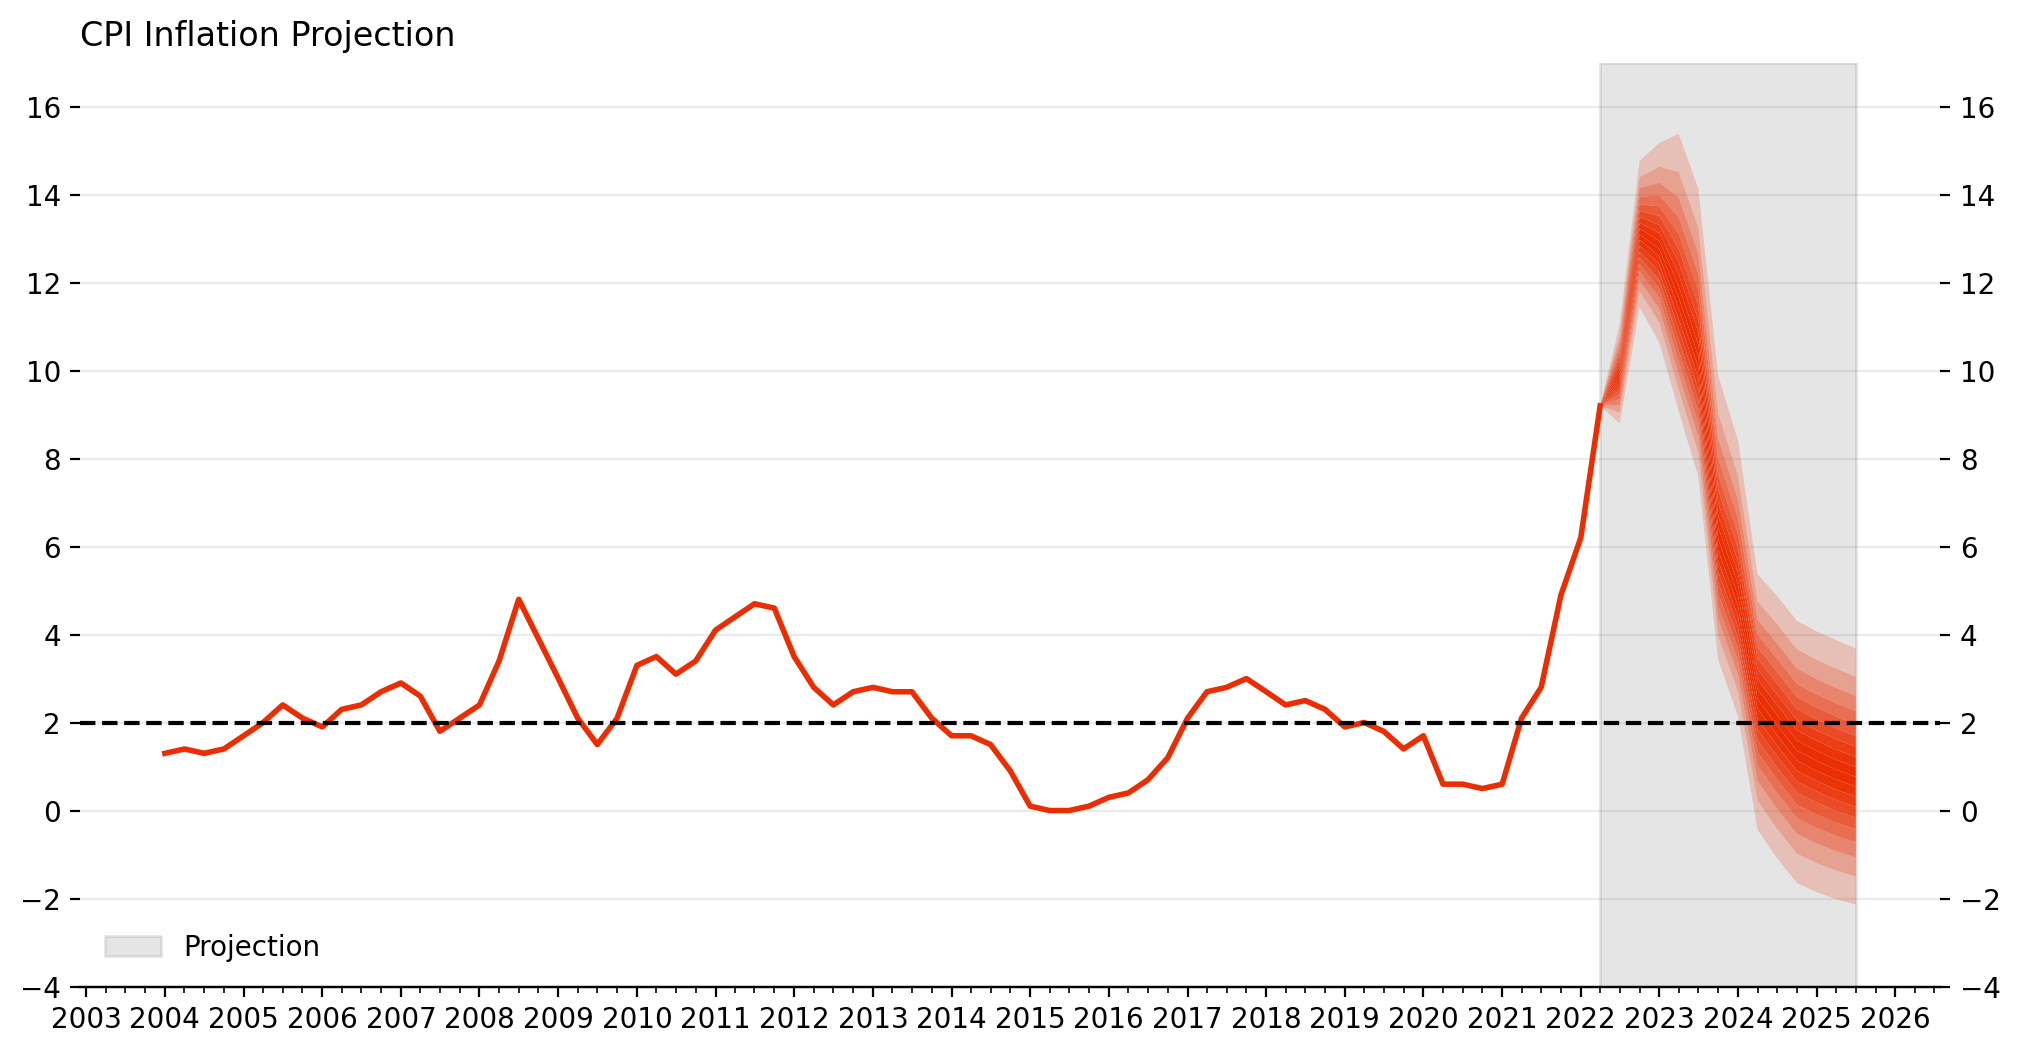

In [8]:
import numpy as np
from fanchart import fan
probs = np.arange(0.05, 1, 0.05)
fan(pars=parameters, probs=probs, historic=history);

We can easily restrict the data in the history part to show only the data that we want. For example, in the following fan chart we show only yearly data from 2018.

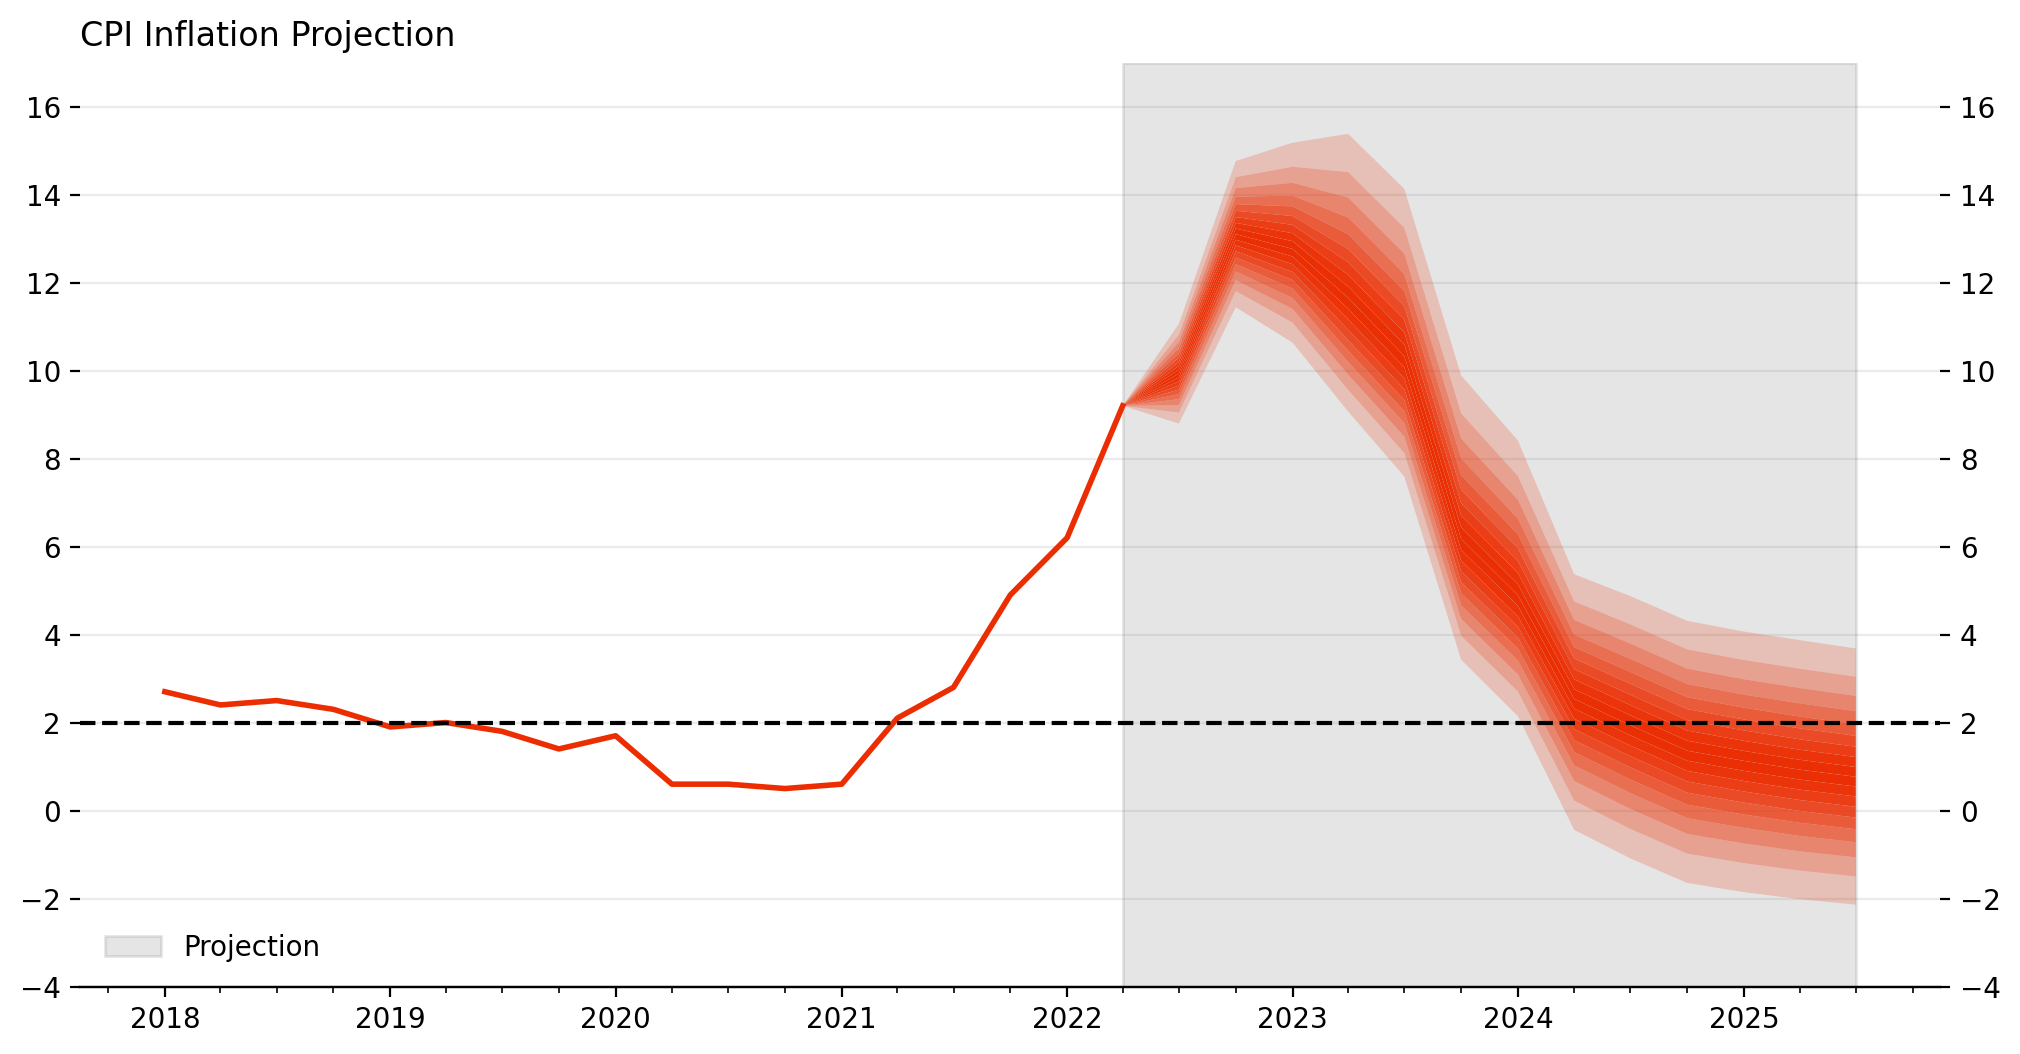

In [9]:
fan(pars=parameters, probs=probs, historic=history[history.Date >= '2018']);

We can also change the probabilities to show different bands and shades according to what we want to show.

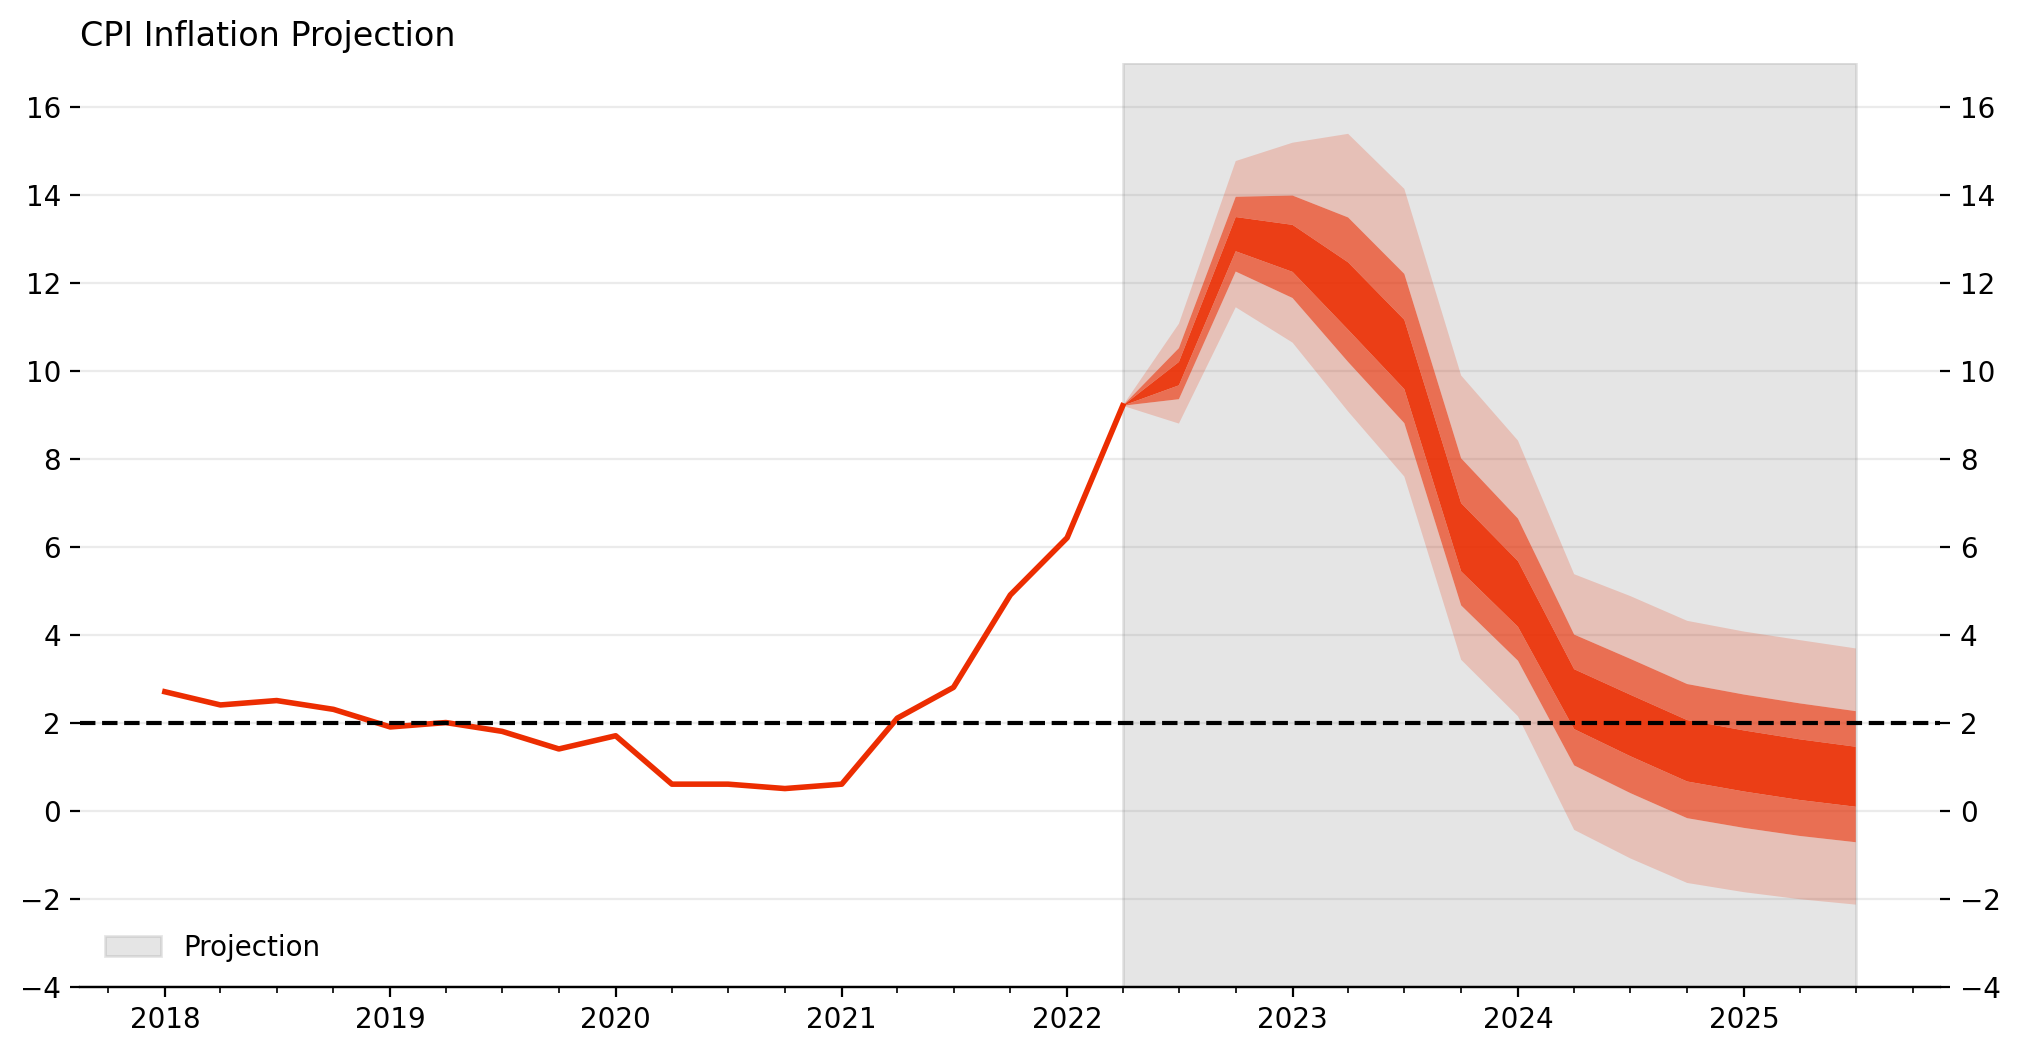

In [10]:
probs = [0.05, 0.20, 0.35, 0.65,0.80,  0.95]
fan(pars=parameters, probs=probs, historic=history[history.Date >= '2018']);

Finally, we can change the choose our favorite color for the fan chart!

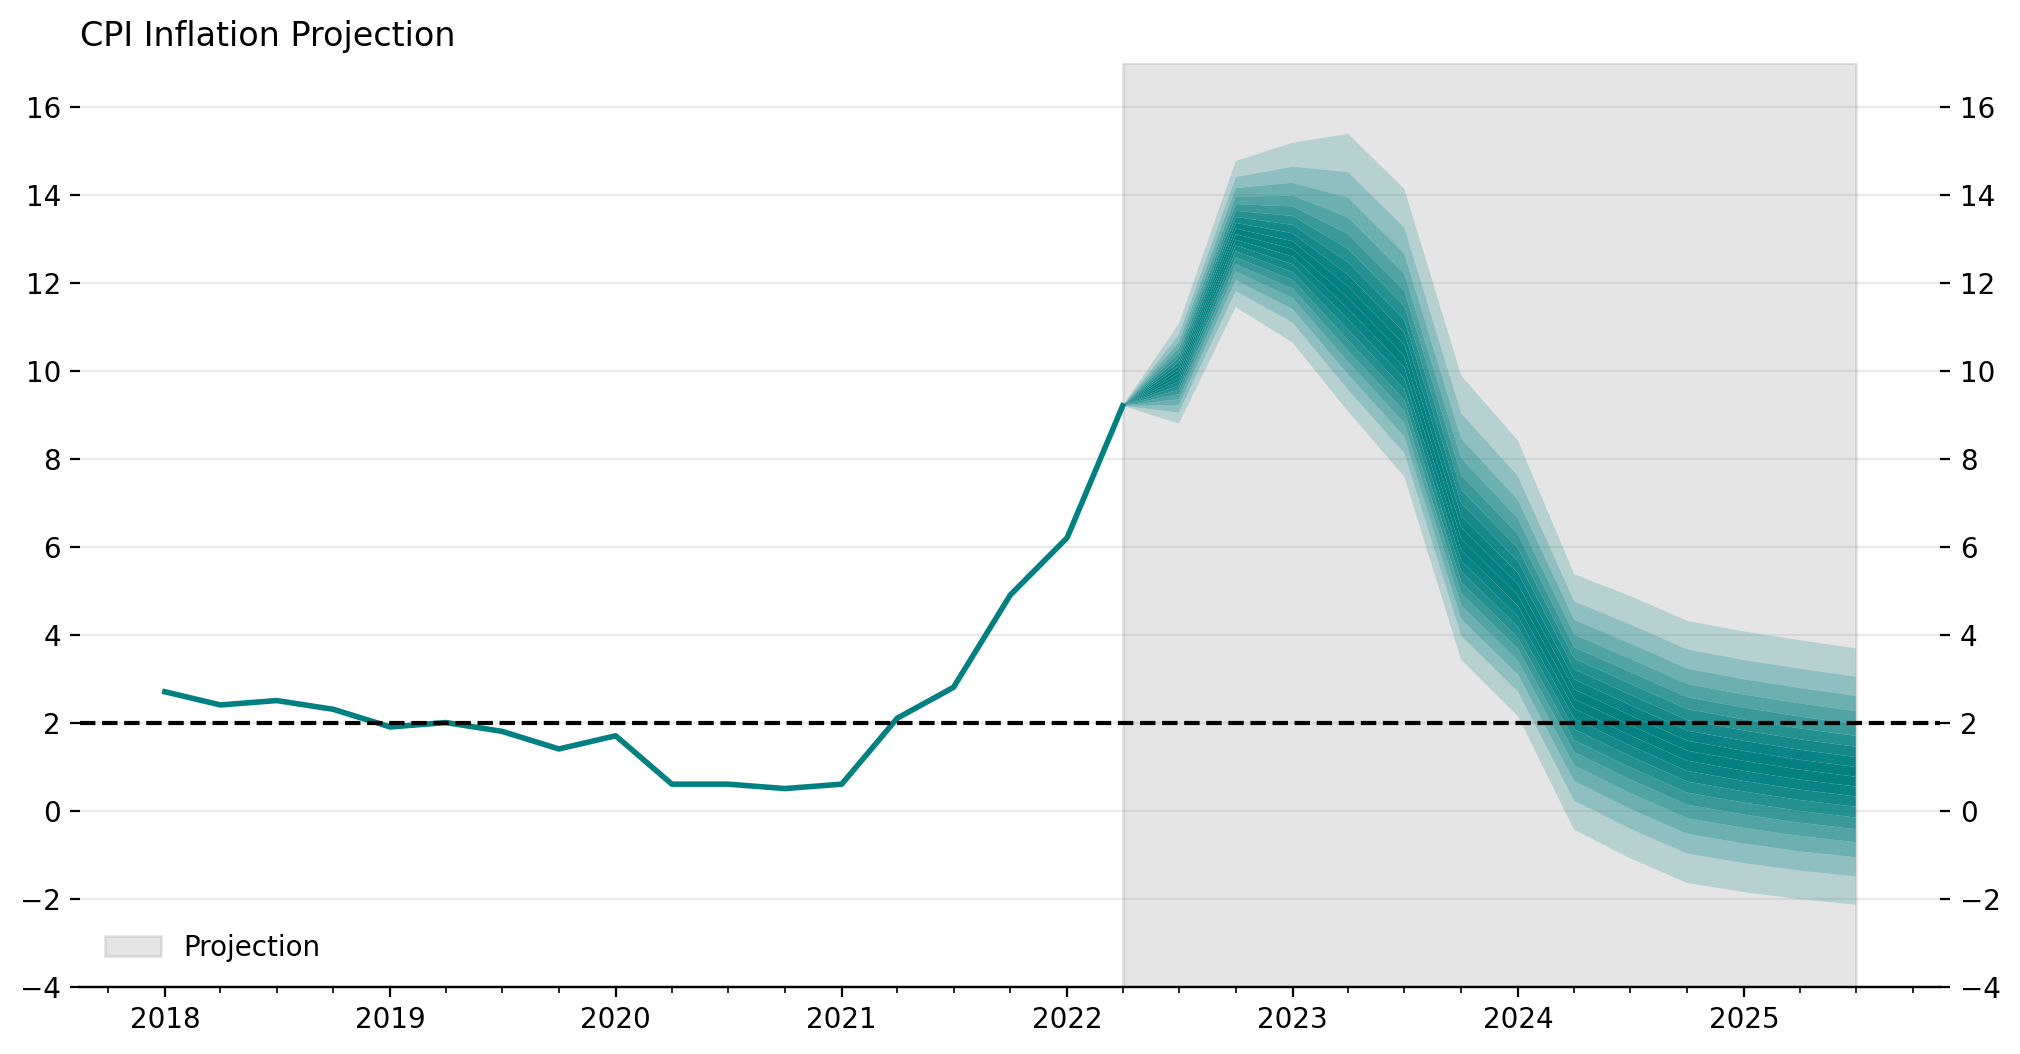

In [11]:
probs = np.arange(0.05, 1, 0.05)
fan(pars=parameters, probs=probs, historic=history[history.Date >= '2018'], color='teal');

The lates release of the package provides functionality for a dark themed fan chart via the function `fan_dark`

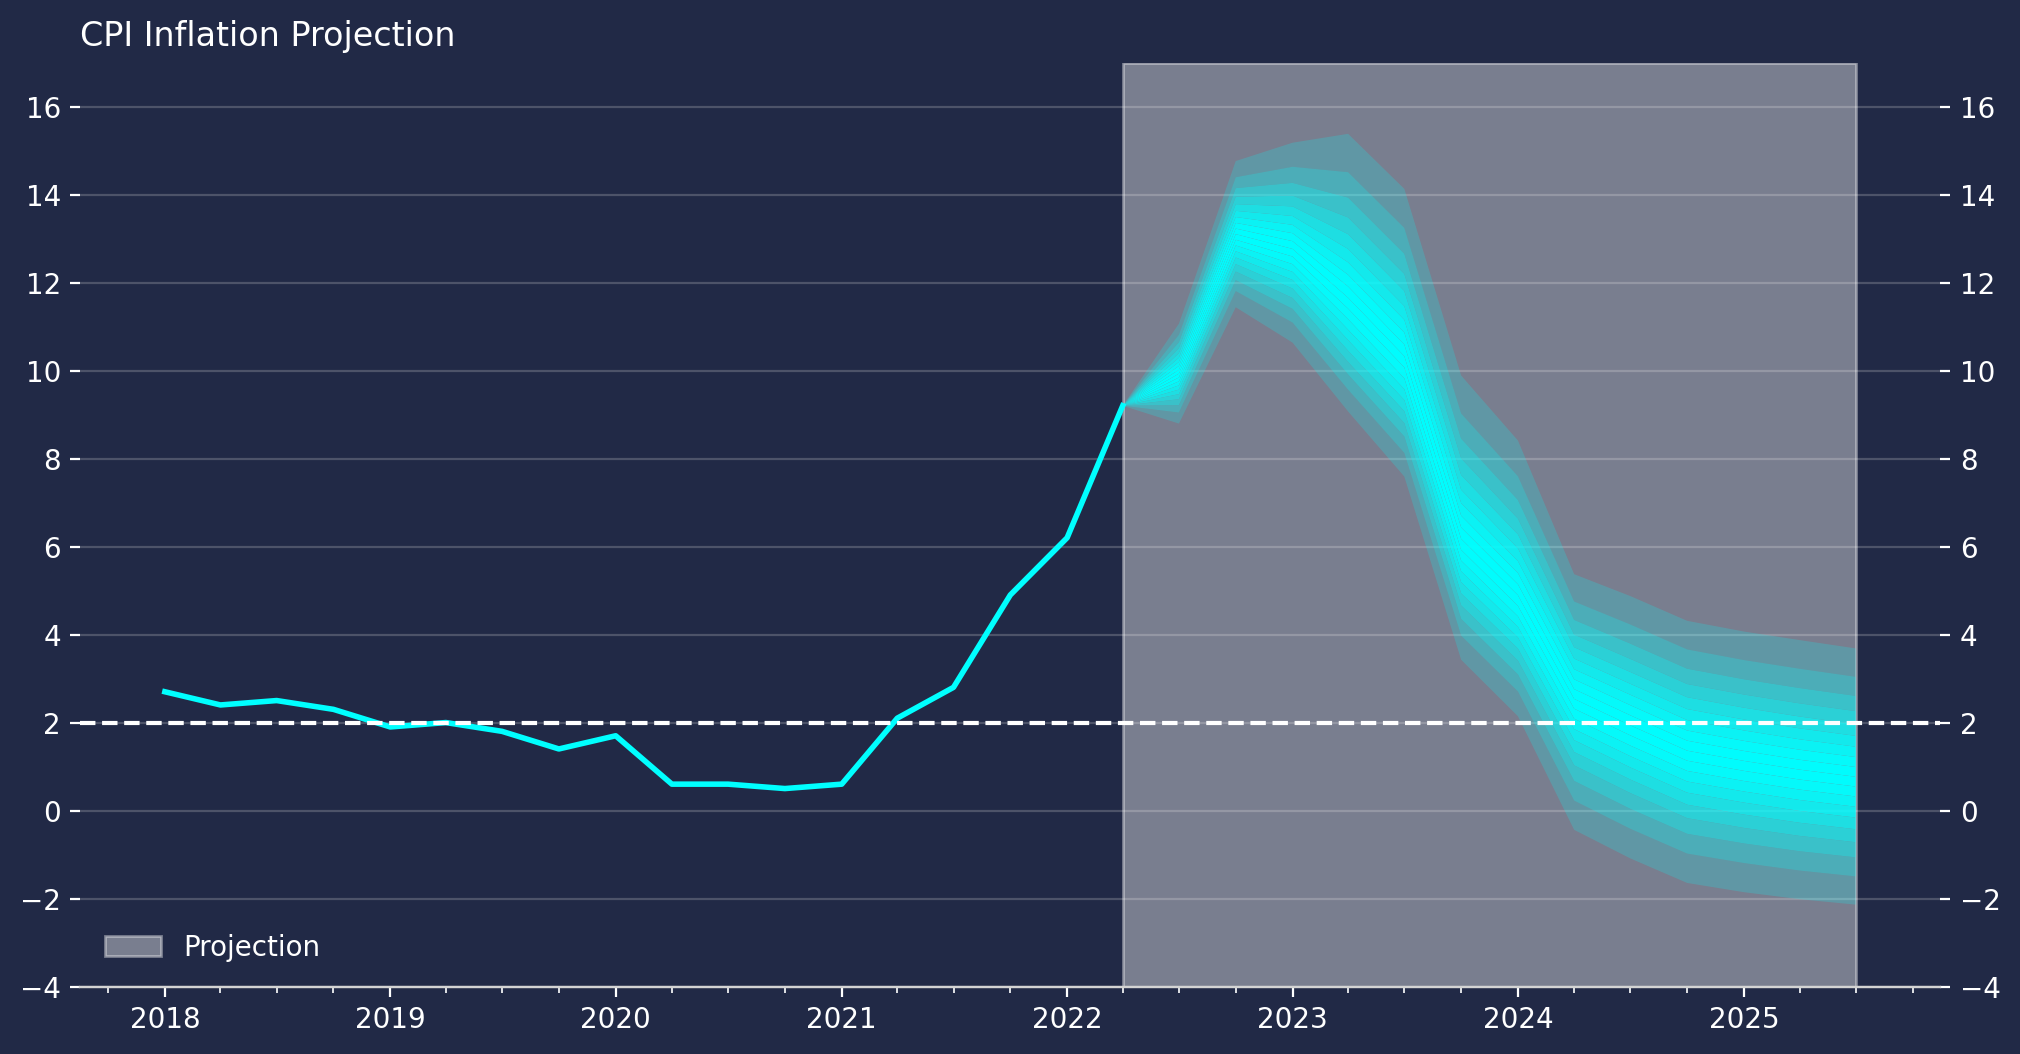

In [12]:
from fanchart import fan_dark
fan_dark(pars=parameters, probs=probs, historic=history[history.Date >= '2018'], color='cyan');

## Make Single Fan Charts

The fanchart package also provides functionality to visualise each of the quarterly forecast on its own. 
This is achieved by the function `fan_single` which requires the following parameters:

- loc   : Locantion parameter (Mode)  
- sigma : Uncertainty parameter
- gamma : Skewness parametere
- probs : A set of probabilities 
- kind  : A string either 'pdf' or 'cdf' to define the type of plot


We can use the parameters loaded before to illustrate the behaviour of this function. 
For instance, if we choose the parameters corresponding to the forecast for 2023-07-01 we obtain:

In [13]:
pars = parameters.iloc[4]
pars

Date           2023-07-01 00:00:00
Mode                          9.53
Uncertainty                   1.68
Skewness                       1.0
Name: 4, dtype: object

In [14]:
loc = pars.Mode
sigma = pars.Uncertainty
gamma = pars.Skewness

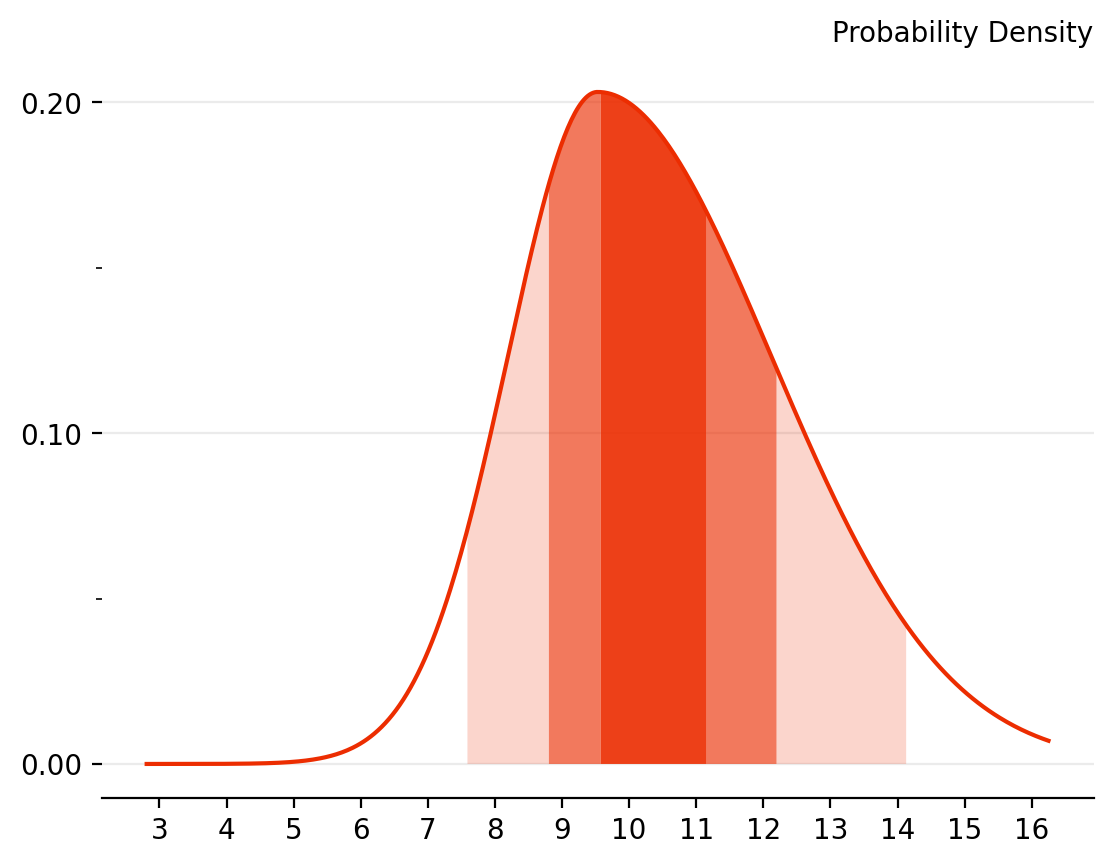

In [15]:
from fanchart import fan_single
probs = [0.05, 0.20, 0.35, 0.65,0.80,  0.95]
fan_single(loc=loc, sigma=sigma, gamma=gamma, probs=probs, kind='pdf');

Similarly, we can make the cdf plot

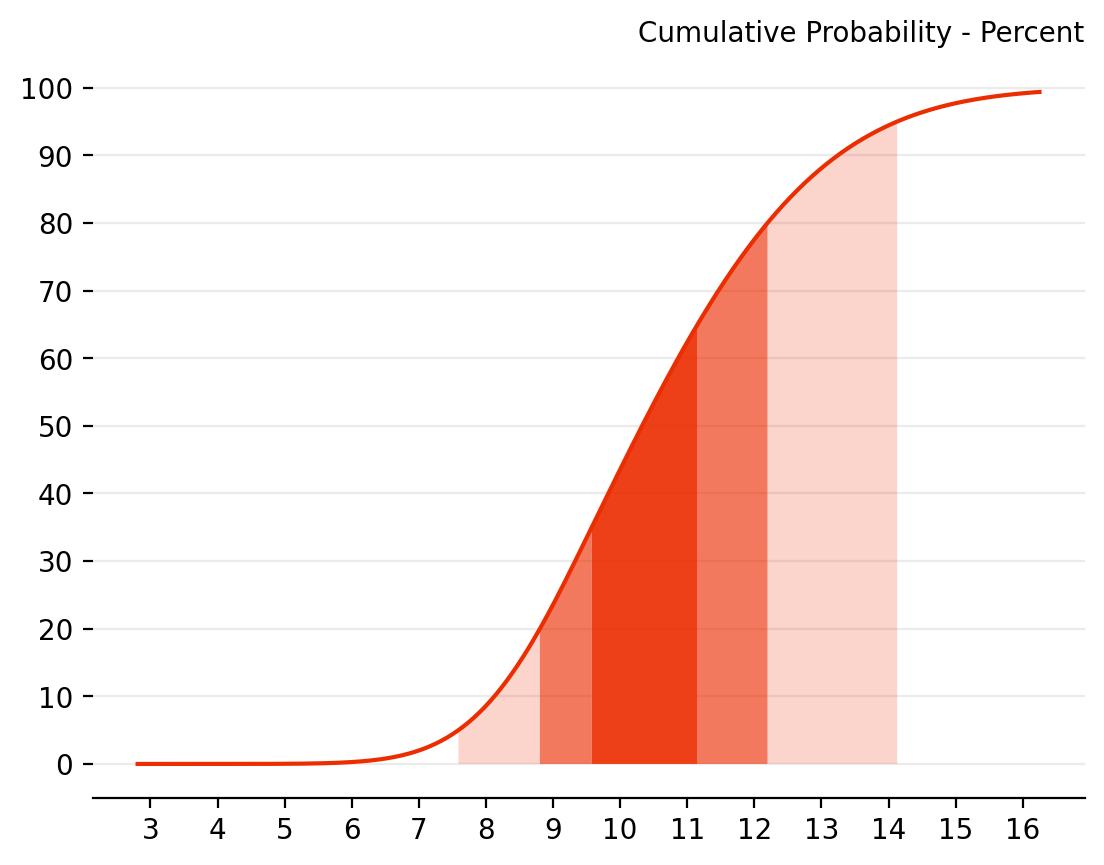

In [16]:
probs = [0.05, 0.20, 0.35, 0.65,0.80,  0.95]
fan_single(loc=loc, sigma=sigma, gamma=gamma, probs=probs, kind='cdf');

The new release also offers a dark theme version of these plots via the function `fan_single_dark`

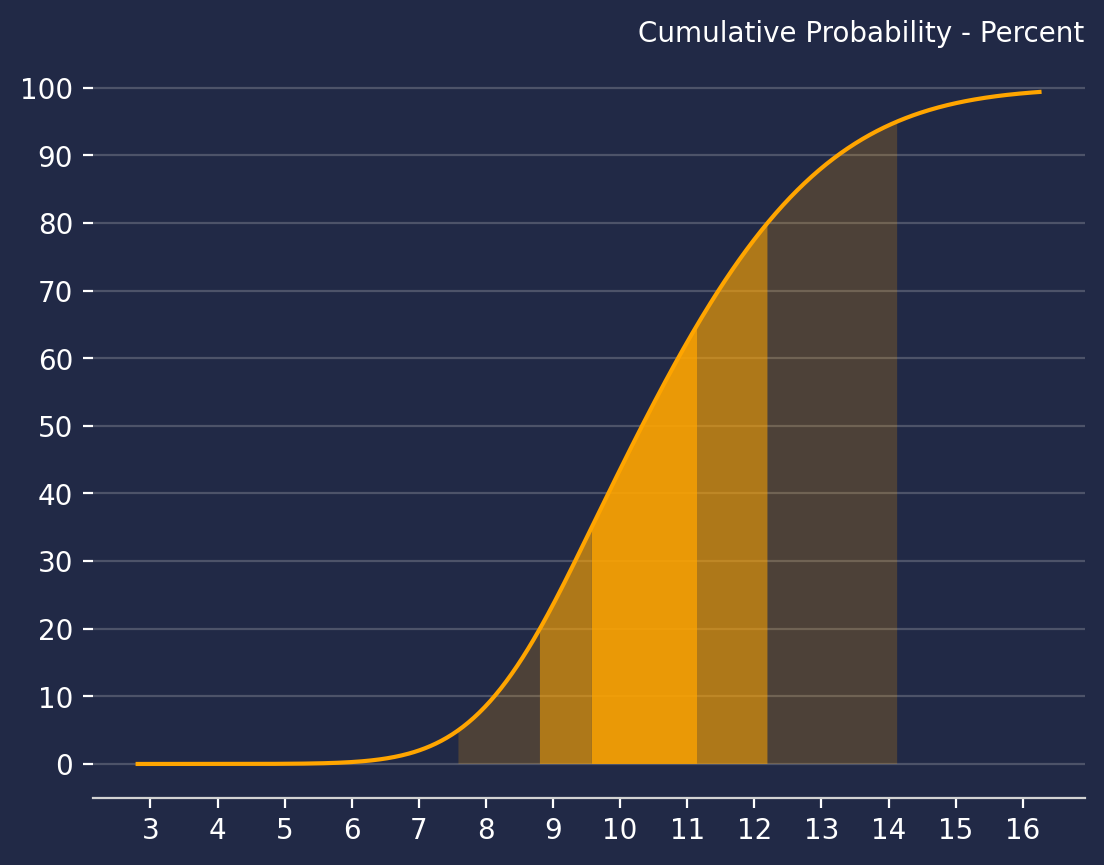

In [17]:
from fanchart import fan_single_dark


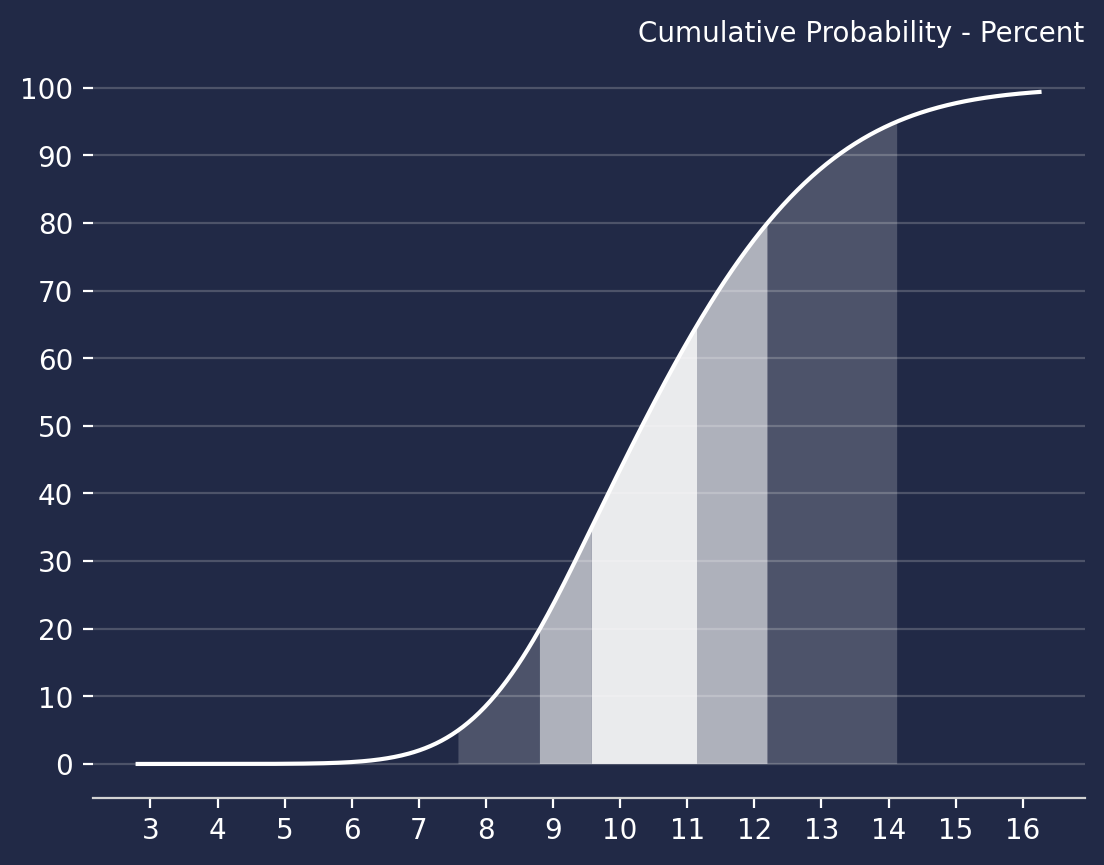

In [18]:
fan_single_dark(loc=loc, sigma=sigma, gamma=gamma, probs=probs, kind='cdf', color='white');

Passing more probabilities, we get more bands (and shades) in the plots

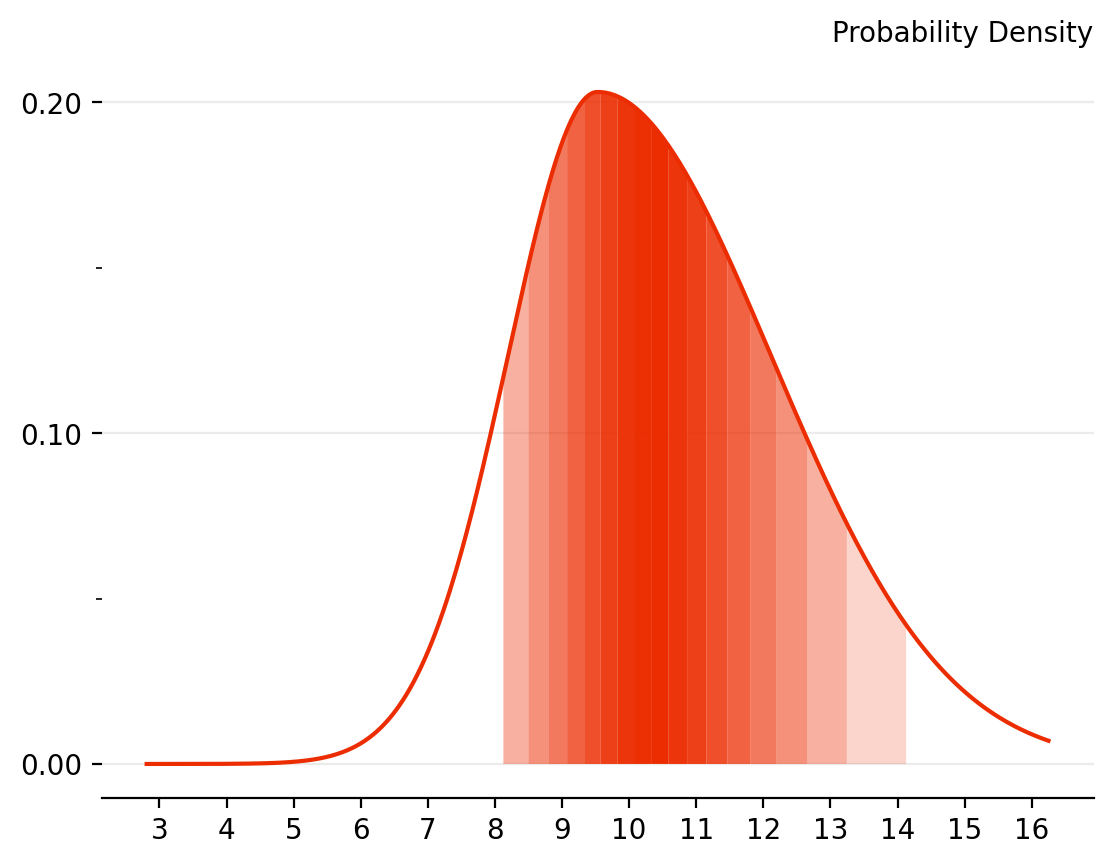

In [19]:
probs = np.arange(0.10, 1, 0.05)
fan_single(loc=loc, sigma=sigma, gamma=gamma, probs=probs, kind='pdf');

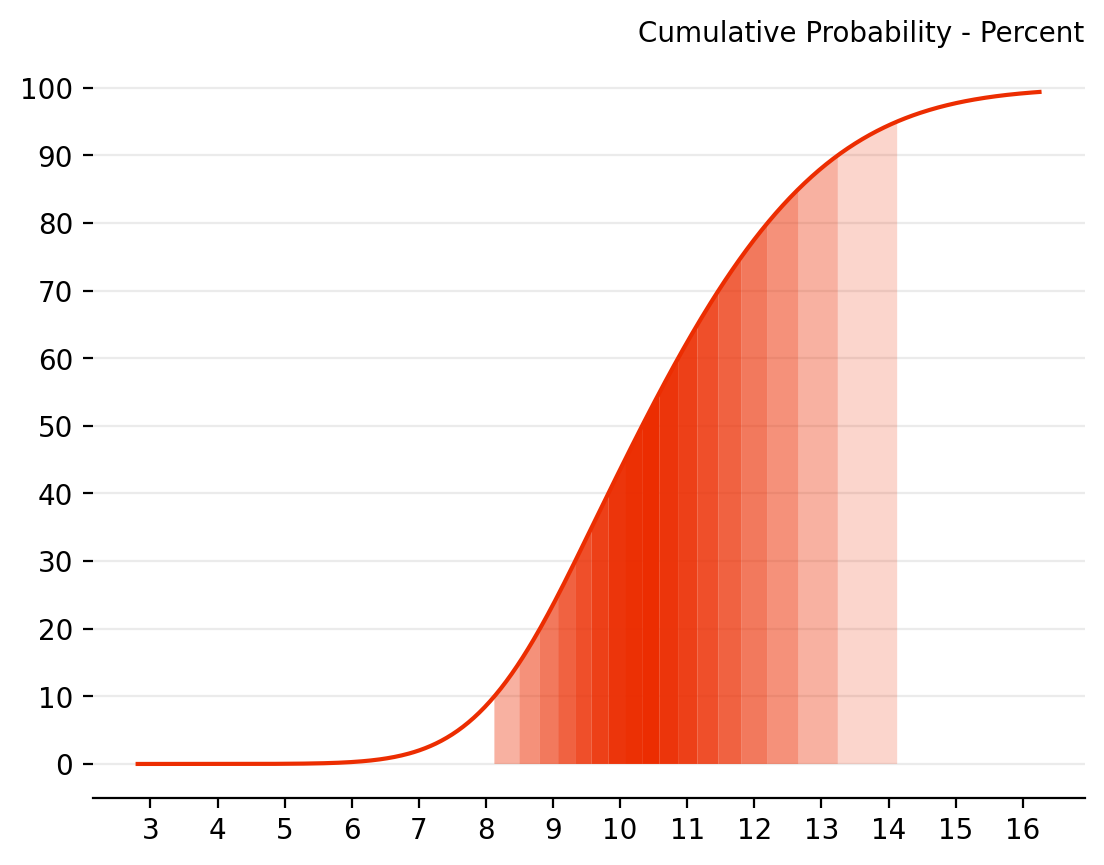

In [20]:
fan_single(loc=loc, sigma=sigma, gamma=gamma, probs=probs, kind='cdf');

END